# Analysis of Sales Data of Addex Electronics Inc., 2019

In [281]:
#import libraries to use
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np

In [282]:
#import the sales data
#getting a month from the whole dataset for testing 
April_data = pd.read_csv('./Sales_data/Sales_April_2019.csv')
April_data.shape

(18383, 6)

In [283]:
#getting the list of Sales data from the directory
list_of_dir = os.listdir('./Sales_Data')

In [284]:
#storing the dataset in a variable
sales_data = [f for f in list_of_dir]

In [5]:
#content of files in sales_data
sales_data

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [285]:
#put all the dataset in pandas dataframe
#first set an empty dataframe 
#then concat the files in the dataset with the empty dataframe
all_data = pd.DataFrame()
#all_data = []
for file in sales_data:
    df = pd.read_csv('./Sales_data/'+file)
    all_data = pd.concat([all_data, df])

all_data.shape
#you can also check if all ws loaded with
#all_data.to_csv(('all_data.csv',index=False))

(186850, 6)

In [286]:
#A view of the first five rows in the dataset
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [287]:
#get nan data and drop them
nan_data = all_data[all_data.isna().any(axis=1)]
clean_data = all_data.dropna(axis=0, how='any', inplace=False)
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Task One
#  Which month has the highest sales and its value?

In [288]:
#Add a month column. This is done by getting the first two digit(month) in the 'Order Date' column 
clean_data['Months'] = clean_data['Order Date'].str[0:2]
#clean_data['Months'].astype(int)
#clean_data.head()
#1st error here

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [289]:
#get rid of the 'Or' in the Month column
clean_data = clean_data[clean_data['Months'].str[0:2] != 'Or']
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [290]:
#first error has been solved
#change the months column from string to integer
clean_data['Months'].astype(int)
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [291]:
#convert other columns to the right value type
clean_data['Quantity Ordered'] = pd.to_numeric(clean_data['Quantity Ordered'])#convert to integer
clean_data['Price Each'] = clean_data['Price Each'].astype(float)#conter to float
#clean_data['Price Each']

In [292]:
#add sales column
#sales = quantitied ordered * Price each
clean_data['Sales'] = clean_data['Quantity Ordered'] * clean_data['Price Each']
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [293]:
#group by the month to get monthly sales

monthly_sum_sales = clean_data.groupby('Months').sum().reset_index()
monthly_sum_sales

,Months,Quantity Ordered,Price Each,Sales
0,01,10903,1.811768e+06,1.822257e+06
1,02,13449,2.188885e+06,2.202022e+06
2,03,17005,2.791208e+06,2.807100e+06
3,04,20558,3.367671e+06,3.390670e+06
4,05,18667,3.135125e+06,3.152607e+06
5,06,15253,2.562026e+06,2.577802e+06
6,07,16072,2.632540e+06,2.647776e+06
7,08,13448,2.230345e+06,2.244468e+06
8,09,13109,2.084992e+06,2.097560e+06
9,10,22703,3.715555e+06,3.736727e+06


# Visualizing our result from task one using bar plot

Text(0.5, 1.0, 'Sales made monthly from January to December')

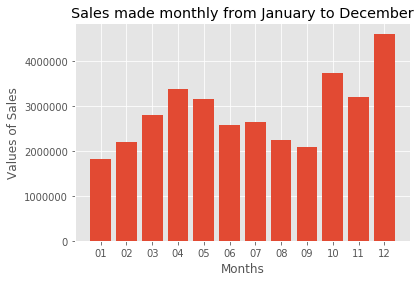

In [34]:
#using bar graph to visualize the result from task one

#we plot the months(x-axis) against the sales(y-axis)
sales_per_month = monthly_sum_sales['Sales']
month = monthly_sum_sales['Months']

plt.bar(month, sales_per_month)
plt.style.use('ggplot')

plt.xlabel('Months')
plt.ylabel('Values of Sales in usd($)')
plt.title('Sales made monthly from January to December')


##### In the 12th month,December, the highest amount of sales was achieved with over four million sales whereas in the 1st month, January,the lowest sale was experienced being below two million.

In [35]:
#Recall the dataset we are working with
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [49]:
#check all activities in Jan
#clean_data[clean_data['Months'] == '01']['Product'].value_counts()
#The second part of this project will go deep into possible insight from this result using correlation

# Task 2: Get the city with highest amount of sale

In [294]:
#we need to add a city column
#use the apply method to create a lambda function that acts on the 'purchase address' column
#we can also use the a  named function
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
clean_data['Cities'] = clean_data['Purchase Address'].apply(lambda x: get_city(x) + '(' + get_state(x)+')')

In [295]:
#the new clean_data
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [296]:
#we now group by months again
sales_by_cities = clean_data.groupby('Cities').sum().reset_index()
sales_by_cities

,Cities,Quantity Ordered,Price Each,Sales
0,Atlanta(GA),16602,2.779908e+06,2.795499e+06
1,Austin(TX),11153,1.809874e+06,1.819582e+06
2,Boston(MA),22528,3.637410e+06,3.661642e+06
3,Dallas(TX),16730,2.752628e+06,2.767975e+06
4,Los Angeles(CA),33289,5.421435e+06,5.452571e+06
5,New York City(NY),27932,4.635371e+06,4.664317e+06
6,Portland(ME),2750,4.471893e+05,4.497583e+05
7,Portland(OR),11303,1.860558e+06,1.870732e+06
8,San Francisco(CA),50239,8.211462e+06,8.262204e+06
9,Seattle(WA),16553,2.733296e+06,2.747755e+06


##### San Francisco(CA) has the highest amount of sales and the highest quantity ordered
Using bar graph to visualize task two result

([<matplotlib.axis.XTick at 0xe05fdf0160>,
 <a list of 10 Text xticklabel objects>)

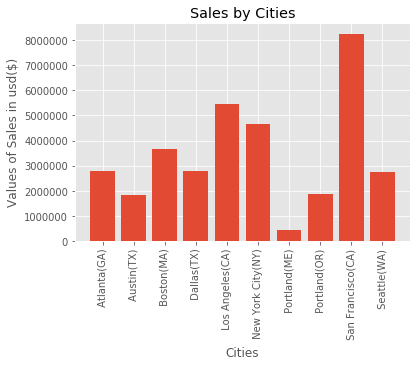

In [90]:
#using bar graph to visualize the result from task two

#we plot the cities(x-axis) against the sales(y-axis)
sales_per_cities = sales_by_cities['Sales']
#cities = np.arange(len(sales_by_cities['Cities']))
cities = sales_by_cities['Cities']

plt.bar(cities, sales_per_cities)
plt.style.use('ggplot')

plt.xlabel('Cities')
plt.ylabel('Values of Sales in usd($)')
plt.title('Sales by Cities')
plt.xticks(cities, rotation='vertical')

# Why is San Francisco having the highest sales and Atlanta having the lowest sales?

##### This might be because there are more affluent people in San Francisco and less in Atlanta

# Task 3: What is best time for advisement to maximize the probability of customers to buy products

In [297]:
#recall the real data source
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [298]:
#import itertools
from itertools import combinations
from collections import Counter
from datetime import datetime

In [299]:
#get hour from the Order Date column 
#first change it to datetime

clean_data['Order Date'] = pd.to_datetime(clean_data['Order Date'])
clean_data.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)


In [310]:
#get the hour figures
clean_data['Hour of Order'] = clean_data['Order Date'].dt.hour
clean_data['Minute of Order'] = clean_data['Order Date'].dt.minute
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour of Order,Minute of Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27


In [319]:
group_clean_data_by_hour = clean_data.groupby('Hour of Order').sum().reset_index()
group_clean_data_by_hour.head()

,Hour of Order,Quantity Ordered,Price Each,Sales,Minute of Order
0,0,4428,709296.70,713721.27,103596
1,1,2619,458490.00,460866.88,61807
2,2,1398,233833.64,234851.44,32508
3,3,928,144726.42,145757.89,23044
4,4,937,162058.18,162661.01,26876


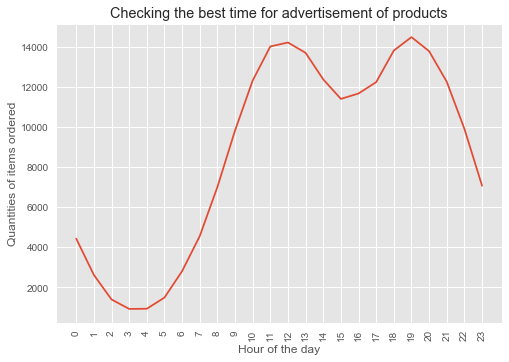

In [322]:
##for visusalization plot the hour of order against the quantities

hour = group_clean_data_by_hour['Hour of Order']
#cities = np.arange(len(sales_by_cities['Cities']))
quantities = group_clean_data_by_hour['Quantity Ordered']

plt.plot(hour, quantities)
plt.style.use('ggplot')

plt.xlabel('Hour of the day')
plt.ylabel('Quantities of items ordered')
plt.title('Checking the best time for advertisement of products')
plt.xticks(hour, rotation='vertical')
plt.show()

##### Evidently the best hour for sale is the 19th hour(that is 7pm)

# Task 4: Product most commonly sold together

In [334]:
#check the order id with duplicates
df = clean_data[clean_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour of Order,Minute of Order,Grouped Product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco(CA),17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,600.00,San Francisco(CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,14.95,New York City(NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,11.95,New York City(NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
#group products with the sae order id in a new column
clean_data['Grouped Products'] = clean_data.groupby('Order ID')['Product'].transform(lambda x: ',',join(x))
clean_data.head()

In [343]:
#remove duplicates
df_drop_duplicates = clean_data[['Order ID','Grouped Product']].drop_duplicates()
df_drop_duplicates.head()

,Order ID,Grouped Product
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [344]:
#count the number of product in the same groups
#import libraries to do this
from itertools import combinations
from collections import Counter

In [351]:
count = Counter()
for product in df_drop_duplicates['Grouped Product']:
    product_list = product.split(',')
    count.update(Counter(combinations(product_list,2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### iphone and Lightning Charging Cable are two products most commonly sold together

# Task 5: What product sold the most and why?

In [352]:
#recall the complete dataset, clean_data
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour of Order,Minute of Order,Grouped Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27,Wired Headphones


In [364]:
#groupby the product and count and sort the quantity ordered from the smallest to the biggest
product_count = clean_data.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered')
product_count

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130
13,Macbook Pro Laptop,4728
8,Flatscreen TV,4819
9,Google Phone,5532
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6244


##### AAA 4-packed batteries(4-pack) is ordered most while the least ordered item is LG Dryer

##### The result of task 5 visually using bar graph

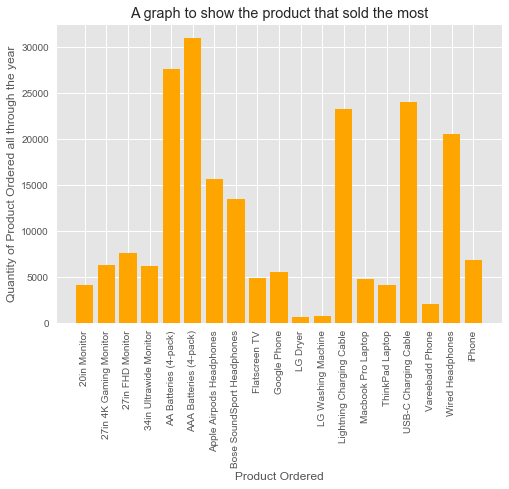

In [363]:
quantity = product_count['Quantity Ordered']
product  = product_count['Product'] 
plt.bar(product, quantity, color='orange')

plt.xlabel('Product Ordered')
plt.ylabel('Quantity of Product Ordered all through the year')
plt.title('A graph to show the product that sold the most')

plt.style.use('ggplot')
plt.xticks(product, rotation='vertical')

plt.show()

##### AAA Batteries might be having high sales because of its corresponding low price.
##### This is checked by plotting the price column on the same graph

In [378]:
#get the average price of each product

average_price = clean_data.groupby('Product').mean()
average_price

,Quantity Ordered,Price Each,Sales,Hour of Order,Minute of Order
Product,,,,,
20in Monitor,1.006828,109.99,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,1.002247,389.99,390.866382,14.593258,29.587640
27in FHD Monitor,1.005728,149.99,150.849141,14.325296,29.299054
34in Ultrawide Monitor,1.002912,379.99,381.096588,14.411260,29.684517
AA Batteries (4-pack),1.343004,3.84,5.157137,14.498809,29.598046
AAA Batteries (4-pack),1.502689,2.99,4.493040,14.404922,29.655201
Apple Airpods Headphones,1.007203,150.00,151.080455,14.361309,29.298990
Bose SoundSport Headphones,1.009906,99.99,100.980520,14.442402,29.463640
Flatscreen TV,1.003958,300.00,301.187500,14.336458,29.747708


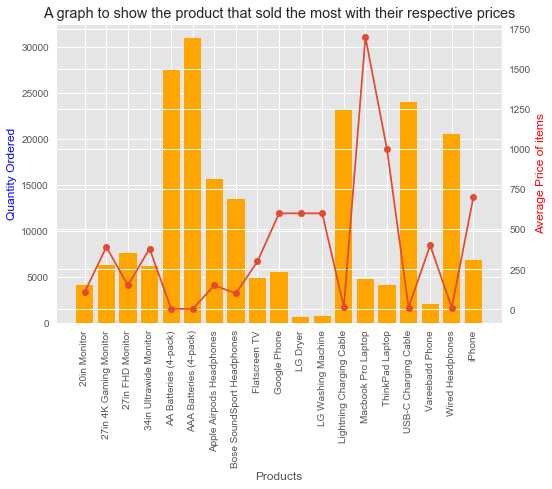

In [382]:
#plot the quantity of ordered items and their prices on the same graph using subplot

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity, color='orange')
ax2.plot(product, average_price['Price Each'], 'o-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax2.set_ylabel('Average Price of items', color='red')
plt.title('A graph to show the product that sold the most with their respective prices')

plt.style.use('ggplot')
ax1.set_xticklabels(product, rotation='vertical')

plt.show()




##### Obviously AAA Bateries had the largest sale because of the lowest price

# Errors encountered
Task 1. ValueError: invalid literal for int() with base 10: 'Or' in task one when converting the month values to string
#solution: Find where the month has 'Or' and drop it  